In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [7]:
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

# Question 1

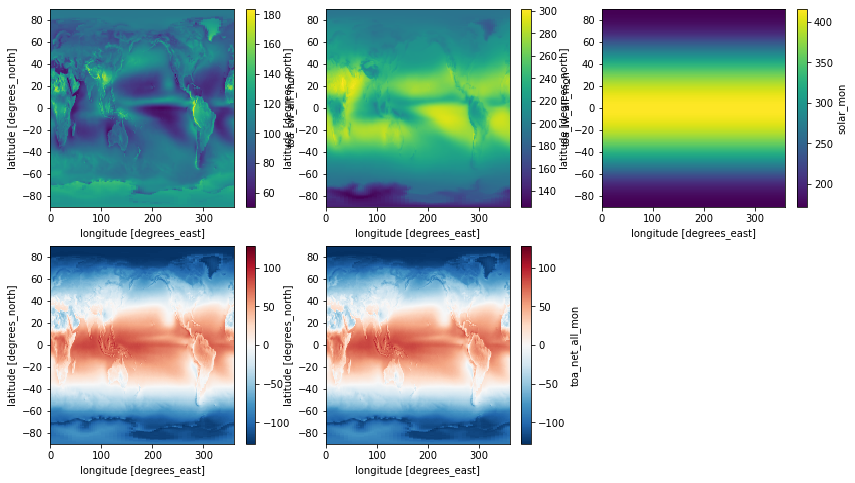

In [10]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
TOA_SW_TimeMean = ds.toa_sw_all_mon.mean(dim='time')
TOA_SW_TimeMean.plot()

plt.subplot(2, 3, 2)
TOA_LW_TimeMean = ds.toa_lw_all_mon.mean(dim='time')
TOA_LW_TimeMean.plot()

plt.subplot(2, 3, 3)
Solar_TimeMean = ds.solar_mon.mean(dim='time')
Solar_TimeMean.plot()

plt.subplot(2, 3, 4)
(Solar_TimeMean - TOA_LW_TimeMean - TOA_SW_TimeMean).plot()

plt.subplot(2, 3, 5)
ds.toa_net_all_mon.mean(dim='time').plot()

plt.show()

# Question 2

In [11]:
weights = np.cos(np.deg2rad(ds.lat))
TOA_SW_Weighted = ds.toa_sw_all_mon.weighted(weights)
TOA_SW_Weighted.mean(dim=('lat', 'lon', 'time'))

<xarray.DataArray 'toa_sw_all_mon' ()>
array(99.13805277)

In [12]:
TOA_LW_Weighted = ds.toa_lw_all_mon.weighted(weights)
TOA_LW_Weighted.mean(dim=('lat', 'lon', 'time'))

<xarray.DataArray 'toa_lw_all_mon' ()>
array(240.26693375)

In [13]:
Solar_Weighted = ds.solar_mon.weighted(weights)
Solar_Weighted.mean(dim=('lat', 'lon', 'time'))

<xarray.DataArray 'solar_mon' ()>
array(340.28326598)

# Question 3

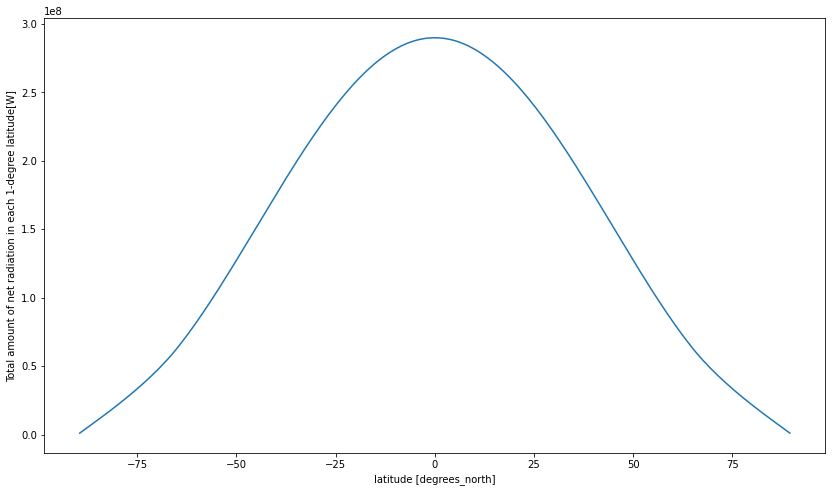

In [14]:
plt.figure(figsize=(14, 8))
Solar_Lat_Mean = ds.solar_mon.mean(dim=('time', 'lon'))
Lat_Area = (2 * np.pi * np.cos(np.deg2rad(ds.lat))) * (111.0 * 1000)
Solar_Amount = Solar_Lat_Mean * Lat_Area

Solar_Amount.plot()
plt.ylabel('Total amount of net radiation in each 1-degree latitude[W]')
plt.show()

# Question 4

In [15]:

Cloud_Mean = ds.cldarea_total_daynight_mon.mean(dim='time')
Low_Cloud_Area = Cloud_Mean.where(Cloud_Mean <= 25.0)
High_Cloud_Area = Cloud_Mean.where(Cloud_Mean >= 75.0)


TOA_SW_Mean = ds.toa_sw_all_mon.mean(dim='time')
TOA_LW_Mean = ds.toa_lw_all_mon.mean(dim='time')

Low_Cloud_SW = TOA_SW_Mean * (Low_Cloud_Area / Low_Cloud_Area)
Low_Cloud_LW = TOA_LW_Mean * (Low_Cloud_Area / Low_Cloud_Area)

High_Cloud_SW = TOA_SW_Mean * (High_Cloud_Area / High_Cloud_Area)
High_Cloud_LW = TOA_LW_Mean * (High_Cloud_Area / High_Cloud_Area)


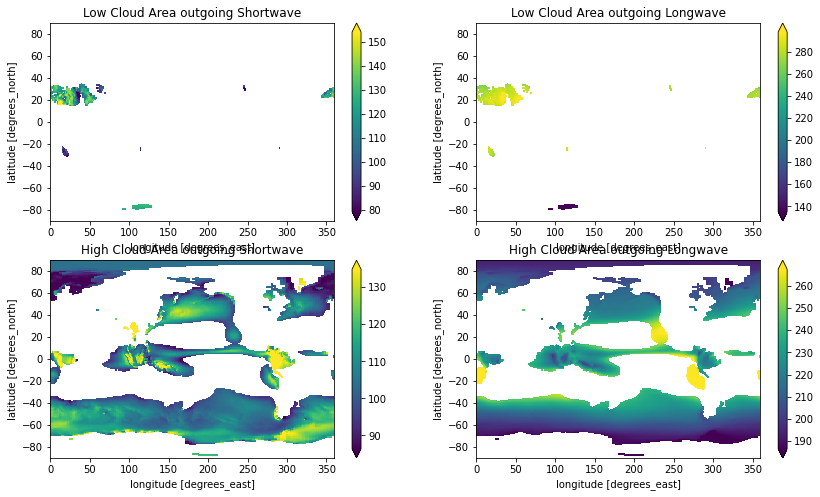

In [30]:
plt.figure(figsize=(14, 8))
ax = plt.subplot(2, 2, 1)
Low_Cloud_SW.plot(robust=True)
ax.set_title('Low Cloud Area outgoing Shortwave')

ax = plt.subplot(2, 2, 2)
Low_Cloud_LW.plot(robust=True)
ax.set_title('Low Cloud Area outgoing Longwave')

ax = plt.subplot(2, 2, 3)
High_Cloud_SW.plot(robust=True)
ax.set_title('High Cloud Area outgoing Shortwave')

ax = plt.subplot(2, 2, 4)
High_Cloud_LW.plot(robust=True)
ax.set_title('High Cloud Area outgoing Longwave')

plt.show()

# Question 5

In [34]:
Cloud_Mean = ds.cldarea_total_daynight_mon.mean(dim='time')
Low_Cloud_Area = Cloud_Mean.where(Cloud_Mean <= 25.0)
High_Cloud_Area = Cloud_Mean.where(Cloud_Mean >= 75.0)

TOA_SW_Mean = ds.toa_sw_all_mon.mean(dim='time')
TOA_LW_Mean = ds.toa_lw_all_mon.mean(dim='time')

Low_Cloud_SW = TOA_SW_Mean * (Low_Cloud_Area / Low_Cloud_Area)
Low_Cloud_SW.mean() 


<xarray.DataArray ()>
array(122.65546, dtype=float32)

In [35]:
Low_Cloud_LW = TOA_LW_Mean * (Low_Cloud_Area / Low_Cloud_Area)
Low_Cloud_LW.mean()


<xarray.DataArray ()>
array(270.10367, dtype=float32)

In [36]:
High_Cloud_SW = TOA_SW_Mean * (High_Cloud_Area / High_Cloud_Area)
High_Cloud_SW.mean()

<xarray.DataArray ()>
array(108.09777, dtype=float32)

In [37]:
High_Cloud_LW = TOA_LW_Mean * (High_Cloud_Area / High_Cloud_Area)
High_Cloud_LW.mean()

<xarray.DataArray ()>
array(216.55675, dtype=float32)